In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

In [2]:
#Importing the resources

mdata= "Resources/Mouse_metadata.csv"
sresult="Resources/Study_results.csv"

In [3]:
#Reading the .csv files


mdata_df= pd.read_csv(mdata)
sresults_df= pd.read_csv(sresult)

In [4]:
mdata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
sresults_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
#Merging the .csv files

combined_df= pd.merge(mdata_df, sresults_df,how='outer', on="Mouse ID")
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
#Checking for total number of unique mouse ID's

total_len=len(combined_df["Mouse ID"].unique())
print("The total length of unique Mouse ID's is", total_len)

The total length of unique Mouse ID's is 249


In [8]:
# Checking for Mouse IDs with duplicate timepoints

duplicate= combined_df[combined_df[["Mouse ID","Timepoint"]].duplicated()== True]
duplicate_id= duplicate["Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [9]:
#Removing the duplicated data from above

final_df= combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
final_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
#Checking the Total Length after the deletion of duplicate IDs

final_len=len(final_df["Mouse ID"].unique())
print("The total length of unique Mouse ID's is", final_len)

#Check later, it should have reduced. It has also been stored in another df

The total length of unique Mouse ID's is 249


In [11]:
#Getting Summary Results

#Seeting the Drug Regimen as the Index

index_df=final_df.set_index('Drug Regimen')
index_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,Female,20,23,0,45.000000,0
Infubinol,a203,Female,20,23,5,48.508468,0
Infubinol,a203,Female,20,23,10,51.852437,1
Infubinol,a203,Female,20,23,15,52.777870,1
Infubinol,a203,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2
Naftisol,z969,Male,9,30,30,65.841013,3
Naftisol,z969,Male,9,30,35,69.176246,4


In [21]:
#Using groupby function

grouped_df= index_df.groupby("Drug Regimen")
grouped_df.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,Female,20,23,0,45.000000,0
Infubinol,a203,Female,20,23,5,48.508468,0
Infubinol,a203,Female,20,23,10,51.852437,1
Infubinol,a203,Female,20,23,15,52.777870,1
Infubinol,a203,Female,20,23,20,55.173336,1
Placebo,a262,Female,17,29,0,45.000000,0
Placebo,a262,Female,17,29,5,48.717568,1
Placebo,a262,Female,17,29,10,49.595181,1
Placebo,a262,Female,17,29,15,53.827974,2


In [22]:
#Finding the mean, meadian, variance, standard deviation, and SEM of the tumor volume.

#Mean

mean= grouped_df["Tumor Volume (mm3)"].mean()



In [23]:
#Median

median= grouped_df["Tumor Volume (mm3)"].median()


In [24]:
#Varience

varience= grouped_df["Tumor Volume (mm3)"].var()


In [25]:
#Standard Deviation

stdev= grouped_df["Tumor Volume (mm3)"].std()


In [26]:
#SEM

sem= grouped_df["Tumor Volume (mm3)"].sem()


In [28]:
# Cerating a dataframe 

summary_df= pd.DataFrame({"Mean Tumor Value": mean,
                          "Median Tumor Value": median,
                          "Varience": varience,
                          "Standard Deviation": stdev,
                          "SEM": sem})

summary_df

,Mean Tumor Value,Median Tumor Value,Varience,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
#Generating a bar graph using pandas plot

plot_df= final_df[["Drug Regimen" , "Timepoint"]]

In [30]:
#Finding the count for each drug

mice_drug= plot_df["Drug Regimen"].value_counts()
mice_drug

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: count, dtype: int64

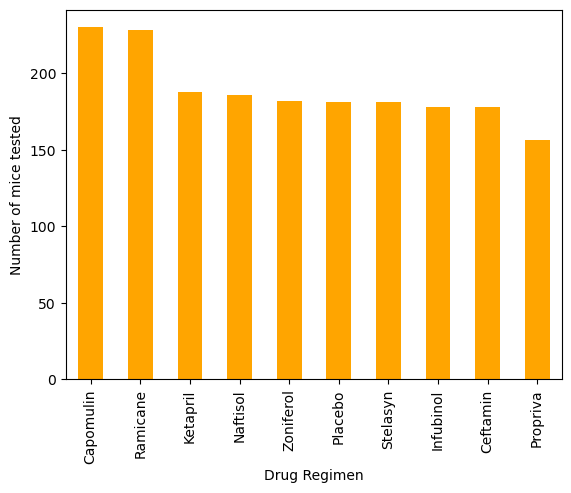

In [32]:
#Plotting the bar graph using pandas

mice_drug.plot(kind="bar" , color="orange" , xlabel="Drug Regimen" , ylabel="Number of mice tested")
plt.show()

In [36]:
#Generating a bar graph using pyplot

drugs= mice_drug.index.values
count= mice_drug.values

print("Drugs:", drugs ,                
      "Count: ", count)

Drugs: ['Capomulin' 'Ramicane' 'Ketapril' 'Naftisol' 'Zoniferol' 'Placebo'
 'Stelasyn' 'Infubinol' 'Ceftamin' 'Propriva'] Count:  [230 228 188 186 182 181 181 178 178 156]


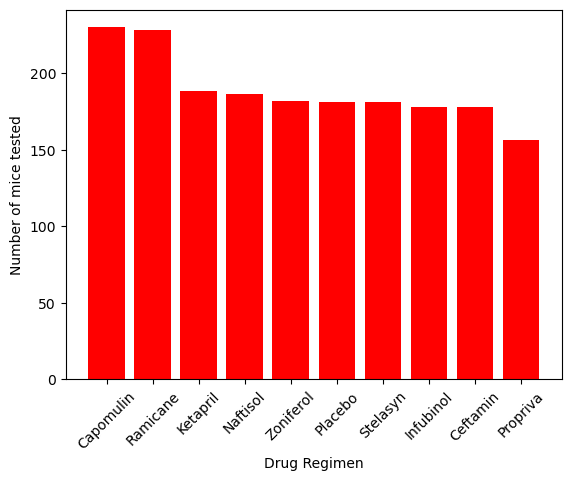

In [37]:
plt.bar(drugs,count, color="red", align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of mice tested')
plt.xticks(rotation=45)
plt.show()

In [39]:
#Calculating the male female counts

mvf= final_df["Sex"].value_counts()
mvf

Sex
Male      958
Female    930
Name: count, dtype: int64

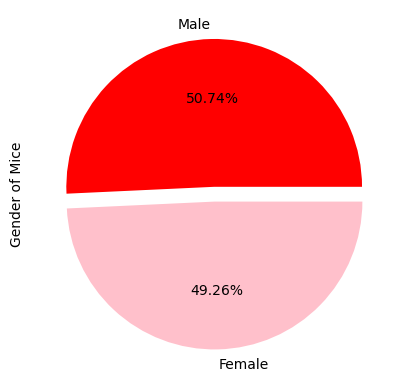

In [49]:
#PLotting a pie chart with pandas

sex=["Male" , "Female"]
explode= [0.05]* len(sex)
mvf.plot(kind="pie", ylabel= "Gender of Mice" , autopct= "%1.2f%%", colors=['red' , 'pink'], explode=explode)

plt.show()

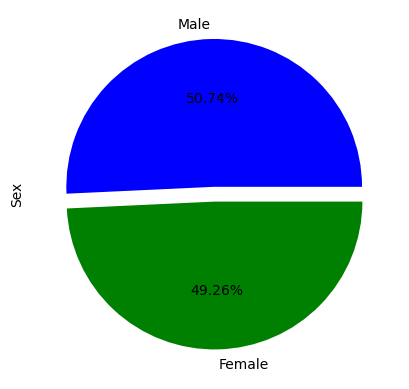

In [50]:
#PLotting using pyplot

slabel= mvf.index.values
countv= mvf.values

plt.pie(countv , labels=slabel , autopct="%1.2f%%", colors=['blue' , 'green'], explode=explode)
plt.ylabel("Sex")
plt.show()

Quartiles,OUtliers, Boxplot

In [52]:
#Calculating the final tumore volume for each drug

final_vol = final_df.loc[(final_df["Drug Regimen"] == "Capomulin") | (final_df["Drug Regimen"] == "Ramicane") |
                         (final_df["Drug Regimen"] == "Infubinol") |(final_df["Drug Regimen"] == "Ceftamin") ]
final_vol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [53]:
#Start by getting the last (greatest) timepoint for each mouse

last_tp = final_vol.groupby(["Drug Regimen","Mouse ID"]).last()
new_last_tp = last_tp.reset_index()


reduced_last_tp=new_last_tp[["Drug Regimen", "Tumor Volume (mm3)"]]
reduced_last_tp

capomulin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Capomulin"]
capomulin_df

ramicane_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Ramicane"]
ramicane_df

infubinol_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Infubinol"]
infubinol_df

ceftamin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Ceftamin"]
ceftamin_df

new_df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"],
         "Ramicane": ramicane_df["Tumor Volume (mm3)"],
          "Infubinol": infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})

new_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [54]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for drug in reduced_last_tp["Drug Regimen"]:
    if drug not in treatment:
        treatment.append(drug)
treatment

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

In [58]:
# Create an empty list to fill with tumor volume
tum_vol = []
upperq_list = []
lowerq_list = []


#Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:    
    quartiles = new_df[drug].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    drug_iqr = upperq-lowerq
    
    #list containing upper and lower quartiles of drug final timor volume 
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)
    print(f"iqr for {drug}: {drug_iqr}")
    
upperq_list   
lowerq_list


iqr for Capomulin: 7.781863460000004
iqr for Ceftamin: 15.577752179999997
iqr for Infubinol: 11.477135160000003
iqr for Ramicane: 9.098536719999998


[32.37735684, 48.72207785, 54.04860769, 31.56046955]

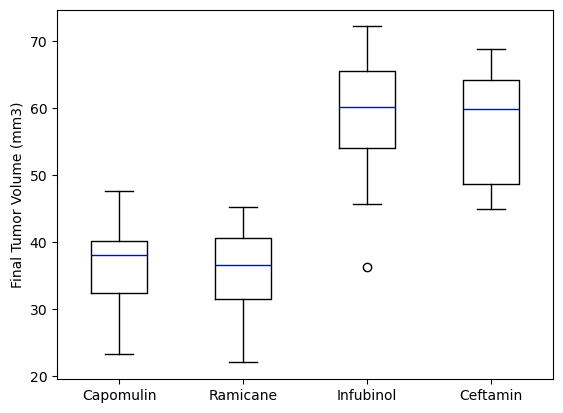

In [60]:
#Plotting a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot = new_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')
plt.show()

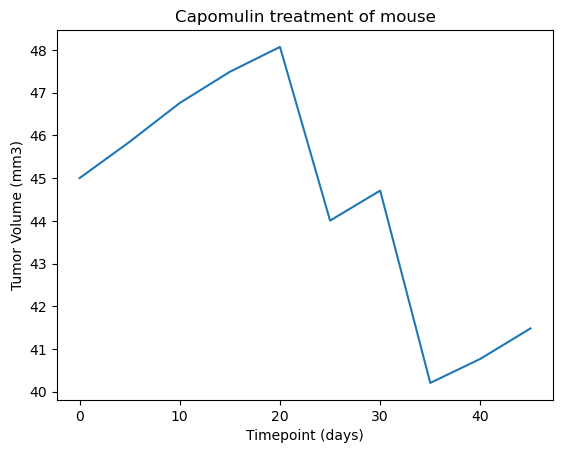

In [63]:
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#create dataframe with just Capolumin data
capomulin_df = final_df.loc[(final_df["Drug Regimen"] == "Capomulin") & (final_df["Mouse ID"] == "l509") ]
reduced_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])

#get values ready for plotting
timepoint = reduced_capomulin_df.index.values
tumor_vol = reduced_capomulin_df.values

#graph build and display
plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

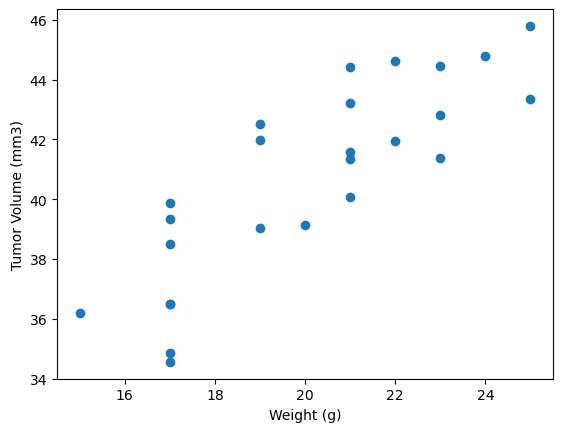

In [64]:
#Plotting a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
new_capomulin_df = final_df.loc[(final_df["Drug Regimen"] == "Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")

#find and store avg tumor vol for each weight
avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumor_vol})
#graph build and display
plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


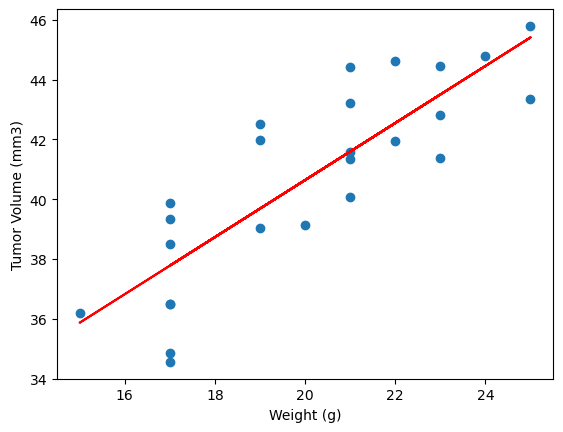

In [65]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr (weight,avg_tumor_vol )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values=avg_capomulin_df["Weight (g)"]
y_values=avg_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()